In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("titanic.csv")

In [9]:
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
print("INFO:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB
INFO:
 None


In [13]:
print("\nDESCRIBE:\n", df.describe(include='all'))


DESCRIBE:
         Unnamed: 0    survived      pclass   sex         age       sibsp  \
count   891.000000  891.000000  891.000000   891  714.000000  891.000000   
unique         NaN         NaN         NaN     2         NaN         NaN   
top            NaN         NaN         NaN  male         NaN         NaN   
freq           NaN         NaN         NaN   577         NaN         NaN   
mean    445.000000    0.383838    2.308642   NaN   29.699118    0.523008   
std     257.353842    0.486592    0.836071   NaN   14.526497    1.102743   
min       0.000000    0.000000    1.000000   NaN    0.420000    0.000000   
25%     222.500000    0.000000    2.000000   NaN   20.125000    0.000000   
50%     445.000000    0.000000    3.000000   NaN   28.000000    0.000000   
75%     667.500000    1.000000    3.000000   NaN   38.000000    1.000000   
max     890.000000    1.000000    3.000000   NaN   80.000000    8.000000   

             parch        fare embarked  class  who adult_male deck  \
coun

In [15]:
print("\nMISSING VALUES:\n", df.isnull().sum())


MISSING VALUES:
 Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [23]:
for col in df.select_dtypes(include='object').columns:
    print("\n",col,"\n",df[col].value_counts())


 sex 
 sex
male      577
female    314
Name: count, dtype: int64

 embarked 
 embarked
S    644
C    168
Q     77
Name: count, dtype: int64

 class 
 class
Third     491
First     216
Second    184
Name: count, dtype: int64

 who 
 who
man      537
woman    271
child     83
Name: count, dtype: int64

 deck 
 deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

 embark_town 
 embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

 alive 
 alive
no     549
yes    342
Name: count, dtype: int64


# Histogram

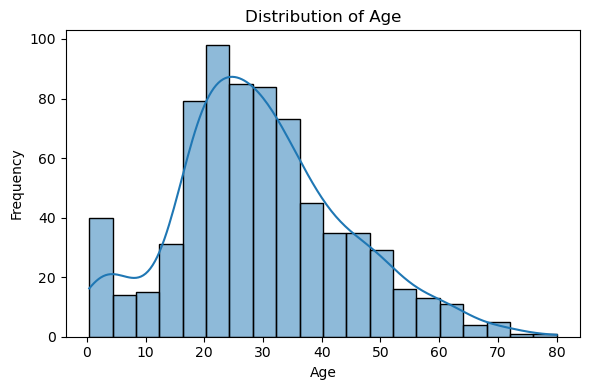

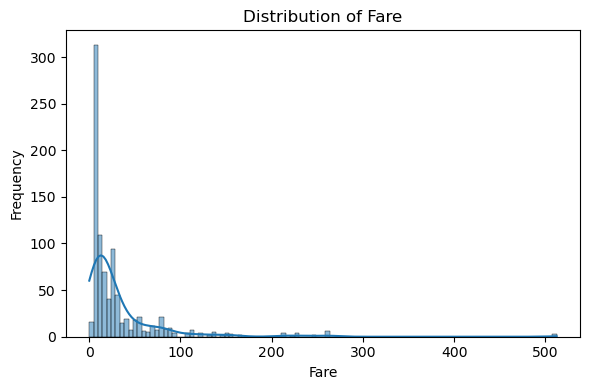

In [29]:
numerical_cols = ['age', 'fare']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Boxplot: Age vs Survival

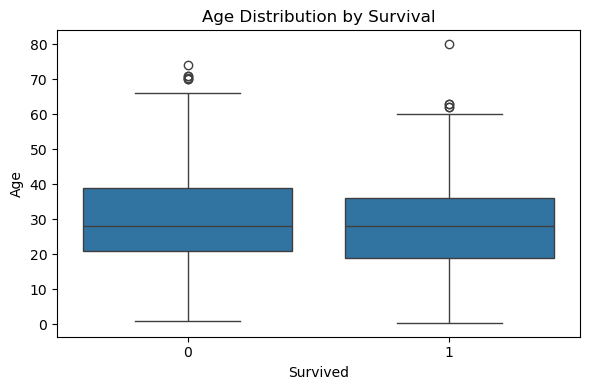

In [32]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Countplot: Survival by Gender

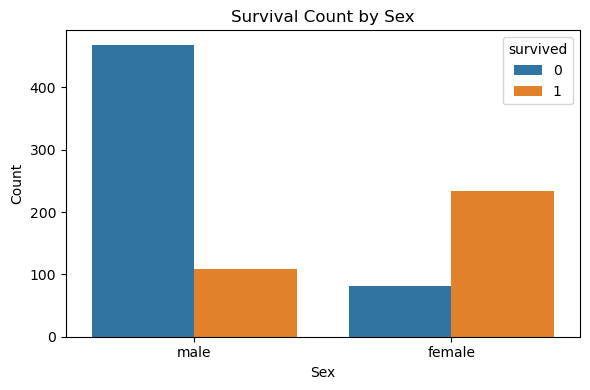

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Correlation Heatmap

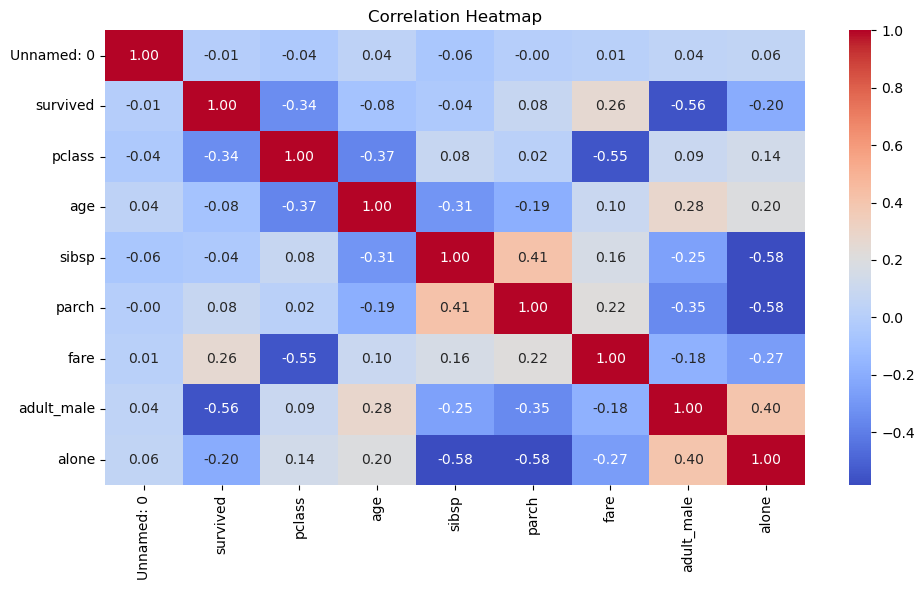

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Pairplot (Fixed)

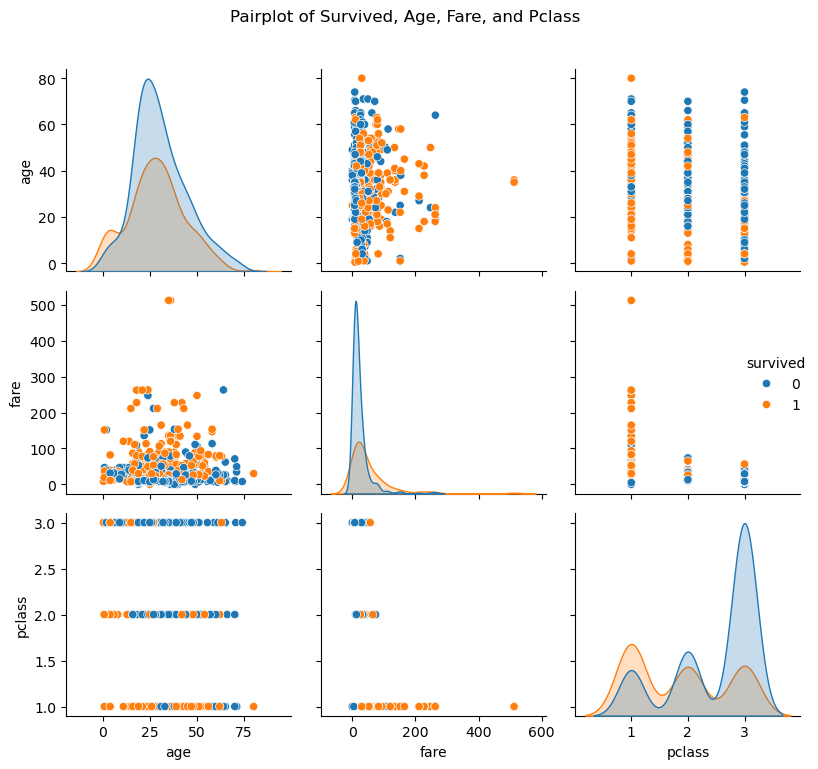

In [42]:
pairplot_data = df[['survived', 'age', 'fare', 'pclass']].dropna()
sns.pairplot(pairplot_data, hue='survived')
plt.suptitle("Pairplot of Survived, Age, Fare, and Pclass", y=1.02)
plt.tight_layout()
plt.show()